# Multi-sites

author: steeve.laquitaine@epfl.ch  
last modified: 17.07.2024
status: up-to-date

* 50 sites (sites in cortex) are shown as for other neuropixels experiments

## Setup

create and activate env from `spikeinterf..`

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si
import yaml 

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS

# silico
data_conf, param_conf_sili = get_config(
    "silico_neuropixels", "npx_spont"
).values()
PREPRO_PATH = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

SAMPFREQ = 40000  # hz

# figure parameters
SAVE_FIG = False
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)

NUM = 1444  # 1425  # 1421 # 1414  # 1409  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
DURATION = 10  # 20  # in ms, 46
PLOT_Y_PITCH = 20
n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)
Y_MAX = PLOT_Y_PITCH * 95


# FIGURE SETTINGS
#FIGSIZE = (1.05, 2.10)
FIGSIZE = (1.3, 5.9)
# colors
COLOR_S = [0.9, 0.14, 0.15]
LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

2024-12-13 14:56:06,198 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-13 14:56:06,233 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Load dataset

In [ ]:
if SAVE_FIG_DATA:
        
    # get preprocessed
    Recording = si.load_extractor(PREPRO_PATH)

    # get layer metadata
    layers = Recording.get_property("layers")

    prep_traces = Recording.get_traces()
    n_contacts = prep_traces.shape[1]
    
    # save figure data
    fig_data = {
        "trace": prep_traces[PERIOD, :],
        "layers": layers
    }
    # save figure data
    np.save(fig_data_paths["fig2h_spacetime_sili_npx"], fig_data)
elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2h_spacetime_sili_npx"], allow_pickle=True).item()

In [ ]:
# get column one sites per layer
col1_site_out = np.where(fig_data["layers"][:96] == "Outside")[0]
col1_site_l1 = np.where(fig_data["layers"][:96] == "L1")[0]
col1_site_l2_3 = np.where((fig_data["layers"][:96] == "L2") | (fig_data["layers"][:96] == "L3"))[0]
col1_site_l4 = np.where(fig_data["layers"][:96] == "L4")[0]
col1_site_l5 = np.where(fig_data["layers"][:96] == "L5")[0]
col1_site_l6 = np.where(fig_data["layers"][:96] == "L6")[0]

### Plot

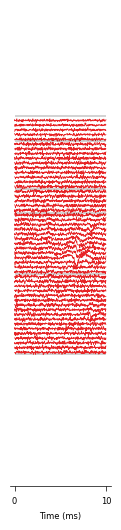

In [ ]:
# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
for contact_i in np.arange(0, 96, 1):

    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.98 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.98 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # do not plot sites outside the cortex
    if contact_i in col1_site_out:
        pass

    # all other traces
    else:
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_S,
        )
    pos_up += PLOT_Y_PITCH

# legend
ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-10, Y_MAX + 10])
plt.yticks([])

# disconnect axes (R style)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("right")

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2b_spacetime_sili_npx.svg", **savefig_cfg
    )